### Question 1.1 : Chargement et informations de base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
           'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, sep='\s+', names=columns, na_values='?')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


In [3]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object


In [4]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


### Question 1.2 : Gestion des valeurs manquantes

In [5]:
print(df.isnull().sum()[df.isnull().sum() > 0])

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

horsepower    6
dtype: int64


### Question 1.3 : Analyse de la distribution de la variable cible

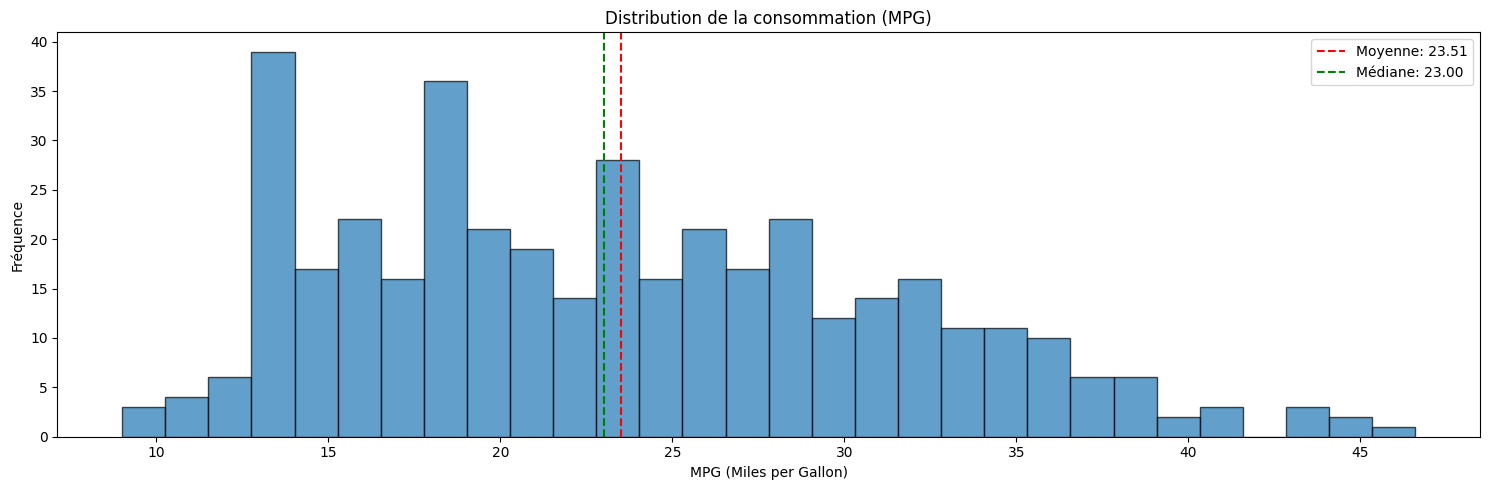

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

axes.hist(df['mpg'], bins=30, edgecolor='black', alpha=0.7)
axes.set_xlabel('MPG (Miles per Gallon)')
axes.set_ylabel('Fréquence')
axes.set_title('Distribution de la consommation (MPG)')
axes.axvline(df['mpg'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["mpg"].mean():.2f}')
axes.axvline(df['mpg'].median(), color='green', linestyle='--', label=f'Médiane: {df["mpg"].median():.2f}')
axes.legend()

plt.tight_layout()
plt.show()

In [7]:

print(f"Moyenne : {df['mpg'].mean():.2f}")
print(f"Médiane : {df['mpg'].median():.2f}")
print(f"Écart-type : {df['mpg'].std():.2f}")
print(f"Variance : {df['mpg'].var():.2f}")
print(f"Min : {df['mpg'].min():.2f}")
print(f"Max : {df['mpg'].max():.2f}")

Moyenne : 23.51
Médiane : 23.00
Écart-type : 7.82
Variance : 61.09
Min : 9.00
Max : 46.60


### Question 1.4 : Exploration des corrélations

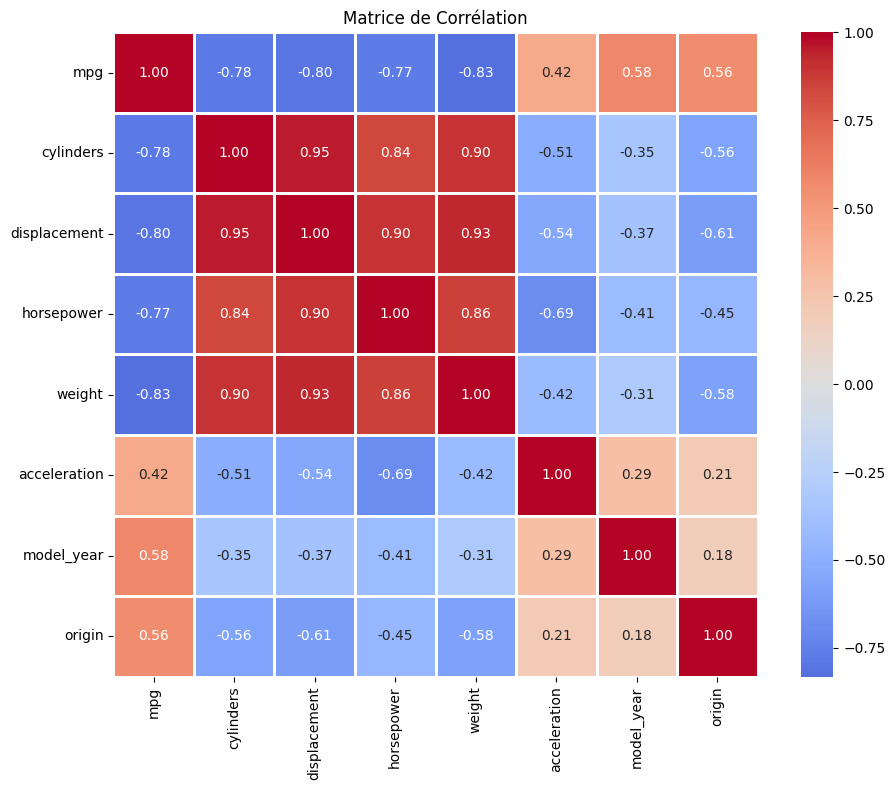

In [8]:
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin']
df_numeric = df[numeric_cols]

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.show()

## Partie 2 : Preprocessing

### Question 2.1 : Préparation des features

In [9]:

X = df.drop(['mpg', 'car_name'], axis=1)
y = df['mpg']


### Question 2.2 : Division train/test

In [10]:
# Division 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Question 2.3 : Standardisation des features

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Partie 3 : Entraînement du Modèle

### Question 3.1 : Régression linéaire simple et évaluation

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [13]:
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

print("\nTEST :")
print(f"R² Score : {r2_test:.4f}")
print(f"RMSE : {rmse_test:.4f} mpg")
print(f"MAE : {mae_test:.4f} mpg")


TEST :
R² Score : 0.8475
RMSE : 2.8632 mpg
MAE : 2.2554 mpg
